

## <font color = blue>   UCI Machine Learning Repository: Energy efficiency Data Set

## <Font color = Blue > Dataset Description

According to the United Nations Environmental Program (UNEP) Sustainable Buildings and Climate Initiative, construction trade contributes as much as 30% to all global greenhouse gas emissions and consumes up to 40% of all energy used worldwide. Climate change is currently having a powerful impact on how buildings are designed and constructed.

Predicting numeric outcomes with some accuracy measure is an important facet of machine learning and data science. For this part, we will use a case study to understand linear regression and its associated cousins. We will learn about the assumptions behind linear regression, multiple linear regression, partial least squares and penalizations. We’ll also focus on strategies for measuring regression performance and implementations.

In this module, we will develop a multivariate multiple regression model to study the effect of eight input variables on two output variables, which are the heating load and the cooling load, of residential buildings. The data provided is from the energy analysis data of 768 different building shapes. The features provided are the relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area and glazing area distribution.

### Simple Linear Regression

In [6]:
#import pandas and Numpy

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns
import sklearn
from scipy import stats

%matplotlib inline

In [18]:
df = pd.read_excel(r"D:\Hamoye Graded Quiz - Stage B\ENB2012_data.xlsx")

df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [20]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [21]:
df =df.rename(columns =column_names)
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [16]:
df.shape

(768, 10)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [24]:
# checking null values

df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [25]:
df.duplicated().any



<bound method Series.any of 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool>

In [26]:
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

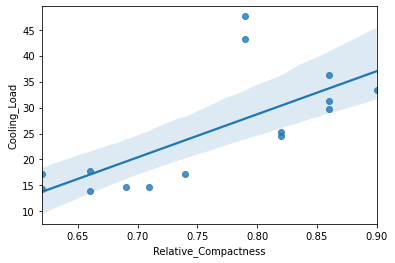

In [19]:
#regression plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load",data=simple_linear_reg_df)

# <font color =RED > Measuring Regression Performance

## <font color = blue> Mean Absolute Error (MAE) 


In [20]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

In [21]:
#Now, we split our dataset into the training and testing dataset.Recall that wehad earlier segmented the features and target variables."""

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features_df,heating_target,test_size =0.3,random_state =1)


In [22]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
#fit the model to the training dataset
Linear_Reg = linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)



In [23]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

## <font color = blue>  Residual Sum of Squares (RSS)

In [24]:
rss = np.sum(np.square(y_test-predicted_values))
round(rss,3)

1.817

## <font color = blue>  Root Mean Square Error (RMSE)

In [25]:
from sklearn.metrics import mean_squared_error
rmse =np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,3)

0.089

## <font color = blue> R-Squared

In [26]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test,predicted_values)

round(r2_score,3)

0.894

In [22]:
Linear_Reg.score(x_train,y_train)

NameError: name 'Linear_Reg' is not defined

In [28]:
Linear_Reg.score(x_test,y_test)

0.8938550769308062

# <font color = Magenta> Penalization Methods

##  <font color = Magenta> Ridge Regression 


In [29]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [30]:
ridge_reg.score(x_train,y_train)

0.9240089033294318

In [31]:
ridge_reg.score(x_test,y_test)

0.8920016069098898

# <font color = Magenta> Feature Selection and Lasso Regression 


In [32]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.0001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0001)

In [33]:
lasso_reg.score(x_train,y_train)

0.9247858973181268

In [34]:
lasso_reg.score(x_test,y_test)

0.8931320941191274

In [35]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
 weights = pd.Series(model.coef_, feat.columns).sort_values()
 weights_df = pd.DataFrame(weights).reset_index()
 weights_df.columns = ['Features', col_name]
 weights_df[col_name].round(3)
 return weights_df

In [36]:
linear_model_weights = get_weights_df(Linear_Reg, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Relative_Compactness,-0.606412,-0.283471,-0.401921
1,Roof_Area,-0.328099,-0.163192,-0.302825
2,Surface_Area,-0.235022,-0.062275,-0.000000
3,Orientation,0.003399,0.003369,0.002651
4,Wall_Area,0.018947,0.103061,-0.000000
5,Glazing_Area_Distribution,0.028452,0.029088,0.027564
6,Glazing_Area,0.215042,0.212449,0.213755
7,Overall_Height,0.393549,0.442467,0.437215
